In [43]:
# 1-1. 전체학생 150명의 수학 점수에 대한
# 평균, 중앙값, 최빈값을 각 각 구하시오.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/student_life_data_cleaned.csv')

# 수학점수 평균 : 75.814
print(df['수학점수'].mean())
# 수학점수 중위 : 79.2
print(df['수학점수'].median())
# 수학점수 최빈값 : 100.0
print(df['수학점수'].mode()[0])

75.814
79.2
100.0


In [44]:
# 1-2. 성별에 따른 평균점수의 차이를 분석하세요.
# 남학생과 여학생의 평균점수를 각각 구하고,
# 어느 그룹의 평균점수가 더 높은지 확인하세요.

# 1) groupby
print(df.groupby('성별')['평균점수'].mean())
# 남성    69.205405
# 여성    64.920548

# 2) Boolean indexing
display(df.loc[df['성별'] == '남성', '평균점수'].mean())
# 69.2054054054054

display(df.loc[df['성별'] == '여성', '평균점수'].mean())
# 64.92054794520547

성별
기타    67.333333
남성    69.205405
여성    64.920548
Name: 평균점수, dtype: float64


np.float64(69.2054054054054)

np.float64(64.92054794520547)

In [45]:
# 1-3. 전공별로 일일공부시간의 평균을 구하고,
# 어느 전공의 학생들이 가장 많은 시간을
# 공부하는지 확인하세요.

major_series = df.groupby('전공')['일일공부시간'].mean()
print(major_series)

display(major_series.sort_values(ascending=False))

전공
경영      4.498684
공학      5.345652
예술      4.683333
의학      3.633333
인문      4.183333
자연과학    3.566667
Name: 일일공부시간, dtype: float64


전공
공학      5.345652
예술      4.683333
경영      4.498684
인문      4.183333
의학      3.633333
자연과학    3.566667
Name: 일일공부시간, dtype: float64

In [46]:
# 1-4. 출석일수의 사분위수(Q1, Q2, Q3)를 구하고,
# IQR Value를 계산하세요!
q75, q50, q25 = np.percentile(df['출석일수'], [75, 50, 25])
print(q25, q50, q75) # 64.0 70.0 74.0

IQR_Value = q75 - q25
print(IQR_Value) # 10.0

64.0 70.0 74.0
10.0


In [47]:
# 1-5. 수면시간이 7시간 이상인 학생들의 평균점수와 학생수를
# 7시간 미만인 학생들의 평균점수의 평균과 학생수를 비교하세요.
# boolean mask 문제

sleep_7_above = df.loc[df['수면시간'] >= 7, '평균점수']
sleep_7_below = df.loc[df['수면시간'] < 7, '평균점수']

print(sleep_7_above.mean(), sleep_7_above.count())
# 69.45357142857142 56

print(sleep_7_below.mean(), sleep_7_below.count())
# 65.67021276595744 94

69.45357142857142 56
65.67021276595744 94


In [48]:
# 2-1. 수학점수, 영어점수, 과학점수 중 어느 과목의 점수 분포가
# 가장 고르게 분포되어 있는지 판단하세요
# 표준편차 문제

print(df['수학점수'].std()) # 19.264388085847617
print(np.std(df['수학점수'])) # 19.20006607627519

print(df['영어점수'].std()) # 18.725435942333228
print(np.std(df['영어점수'])) # 18.662913444106795

print(df['과학점수'].std()) # 22.213086776967163
print(np.std(df['과학점수'])) # 22.138919335264156

# 영어성적이 표준편차가 가장 낮다는건 다른 과목에 비해 평균에 더 고르게 분포 되어있다는 것

19.264388085847617
19.20006607627519
18.725435942333228
18.662913444106795
22.213086776967163
22.138919335264156


In [49]:
# 2-2. 주간운동시간의 표준편차를 구하고,
# 평균 ± 1 표준편차 범위(1 시그마) 내에 있는
# 학생의 비율을 계산하세요

stu_std = np.std(df['주간운동시간'])
# stu_std # 2.373278651055447

student_mean = np.mean(df['주간운동시간'])
# student_mean # 2.0813333333333333


lower_bound = student_mean - stu_std
upper_bound = student_mean + stu_std
print(lower_bound, upper_bound)
# -0.29194531772211363 4.45461198438878

(df.loc[df['주간운동시간'] < upper_bound]).shape[0] # 127

# 전체 학생에 대한 비율은
127 / df.shape[0] # 0.8466666666666667 => 85%의 학생이 1시그마 안에 위치
# 우리의 주간 운동시간은 첨도가 양수가 되면서 정규분포보다 더 뾰족한 형태를 만들어요
# 데이터가 평균에 몰려있다는 의미 + 꼬리부분은 두터워져요!
# 이상치가 존재할 확률이 높아져요!

# 정규분포의 1 시그마의 데이터 비율은 68%
# 정규분포의 2 시그마의 데이터 비율은 95.45%
# 정규분포의 3 시그마의 데이터 비율은 99.7%

-0.29194531772211363 4.45461198438878


0.8466666666666667

In [50]:
# 2-3. 일일공부시간의 분산을 구할 때, 표본분산(n으로 나눔)과
# 불편분산(n-1로 나눔)의 차이를 계산하고 그 의미를 설명하세요.

sta_var = np.var(df['일일공부시간'], ddof=0)
unsta_var = np.var(df['일일공부시간'], ddof=1)
print(sta_var)
print(unsta_var)

diff = unsta_var - sta_var
print(diff)

# 표본이 작은 경우에는 커지고, 표본이 커질수록 거의 0이 된다
# 결국 이 데이터의 표본은 모집단을 잘 대표한다.

7.165966666666663
7.21406040268456
0.048093736017897015


In [51]:
# 3-1. 수학점수에서 IQR 방법을 이용하여 이상치를 탐지하고 적절하게 수정하세요.
# (이상치 기준: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과)

Q1 = np.percentile(df['수학점수'], 25)
Q3 = np.percentile(df['수학점수'], 75)
IQR = Q3 - Q1

# 이상치 기준선
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 데이터 확인
outliers = df[(df['수학점수'] < lower_bound) | (df['수학점수'] > upper_bound)]
print("이상치:\n", outliers)

# 이상치 수정
median_math = df['수학점수'].median()
df.loc[(df['수학점수'] < lower_bound) | (df['수학점수'] > upper_bound)] = median_math

이상치:
       학생ID  나이  성별  전공  일일공부시간  수학점수  영어점수   과학점수  수면시간  주간운동시간  생활만족도  학습만족도  \
48   ST049  21  여성  경영     1.5  26.4  16.8   12.6   4.7     0.0      3      3   
72   ST073  18  남성  공학     4.8  14.0  68.3   75.0   4.2     3.3      5      4   
108  ST109  20  여성  예술     5.4  23.9  52.4   71.6   9.5     4.8      3      4   
129  ST130  21  여성  공학     7.5  16.4  56.7   23.4   3.6     0.3      3      3   
136  ST137  21  남성  공학     7.1  26.4  81.4  100.0  11.0     0.3      4      3   

     출석일수 아르바이트  통학시간   월용돈  평균점수  
48     71    있음    20  70.0  18.6  
72     80    있음    40  20.0  52.4  
108    72    있음    50  48.0  49.3  
129    78    있음    40  40.0  32.2  
136    69    있음    50  35.5  69.3  


/tmp/ipykernel_64417/1370045046.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['수학점수'] < lower_bound) | (df['수학점수'] > upper_bound)] = median_math
/tmp/ipykernel_64417/1370045046.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['수학점수'] < lower_bound) | (df['수학점수'] > upper_bound)] = median_math
/tmp/ipykernel_64417/1370045046.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['수학점수'] < lower_bound) | (df['수학점수'] > upper

13     ST014
45     ST046
97     ST098
119    ST120
Name: 학생ID, dtype: object


/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46024 (\N{HANGUL SYLLABLE DON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from fon

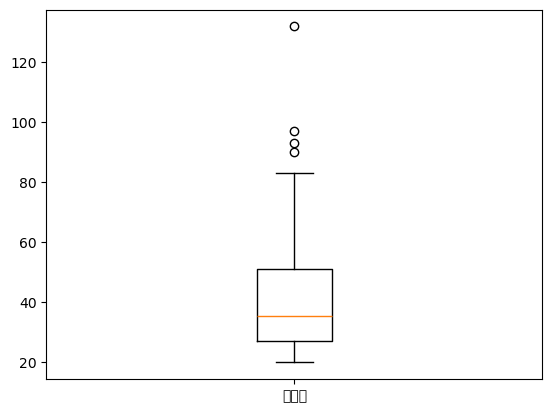

In [52]:
# 3-3. Box plot을 그려 월용돈의 이상치를 시각적으로 확인하고,
# 이상치에 해당하는 학생ID를 찾아내세요.
Q1 = np.percentile(df['월용돈'], 25)
Q3 = np.percentile(df['월용돈'], 75)

# 이상치 기준선
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

result =  df[(df['월용돈'] < lower_bound) | (df['월용돈'] > upper_bound)]

plt.boxplot(df['월용돈'],
            tick_labels=['월용돈'])

print(result['학생ID'])

In [53]:
# 4-1. 수학점수를 Z-score(표준화 점수)로 변환하세요.
# 변환 후 평균과 표준편차를 확인하세요.
from scipy.stats import zscore

df['수학점수'] = zscore(df['수학점수'])

math_mean = np.mean(df['수학점수'])
print(math_mean)

math_std = np.std(df['수학점수'])
print(math_std)

3.8783790993572133e-16
1.0


In [54]:
# 4-2. 영어점수를 Min-Max 정규화를 이용하여 0~1 범위로 변환하세요.

eng = df['영어점수']

max_eng = eng.max()
min_eng = eng.min()

df['Min-Max'] = (eng - min_eng) / (max_eng - min_eng)

print(df['Min-Max'])

0      0.496107
1      0.763070
2      0.834260
3      0.769744
4      0.967742
         ...   
145    0.582870
146    0.616240
147    0.635150
148    0.588432
149    0.859844
Name: Min-Max, Length: 150, dtype: float64


In [55]:
# 4-3. 과학점수를 편차값(평균 50, 표준편차 10)으로 변환하세요.
science = df['과학점수']
sci_mean = np.mean(science)
sci_std = np.std(science)

z = (science - sci_mean) / sci_std

df['편차값'] = z * 10 + 50

display(df)

,학생ID,나이,성별,전공,일일공부시간,수학점수,영어점수,과학점수,수면시간,주간운동시간,생활만족도,학습만족도,출석일수,아르바이트,통학시간,월용돈,평균점수,Min-Max,편차값
0,ST001,20.0,여성,공학,4.8,-0.260076,54.7,48.6,5.3,3.9,3.0,3.0,74.0,없음,50.0,35.5,58.9,0.496107,42.779321
1,ST002,25.0,남성,경영,8.8,0.825619,78.7,87.5,5.7,0.6,4.0,3.0,68.0,없음,30.0,45.0,85.8,0.763070,60.919621
2,ST003,22.0,남성,경영,4.0,1.365400,85.1,84.0,7.8,0.0,5.0,1.0,64.0,있음,30.0,38.0,89.7,0.834260,59.287460
3,ST004,21.0,남성,인문,2.0,1.297928,79.3,67.4,4.3,0.4,4.0,4.0,72.0,있음,40.0,20.0,81.9,0.769744,51.546356
4,ST005,19.0,기타,인문,4.8,1.365400,97.1,100.0,7.3,0.0,5.0,3.0,70.0,없음,60.0,33.0,99.0,0.967742,66.748766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,ST146,18.0,남성,예술,8.9,0.377847,62.5,77.1,5.6,3.5,4.0,4.0,65.0,있음,20.0,20.0,74.5,0.582870,56.069772
146,ST147,21.0,여성,의학,4.7,0.341043,65.5,45.9,3.0,4.1,5.0,3.0,74.0,없음,10.0,29.0,64.9,0.616240,41.520226
147,ST148,21.0,남성,자연과학,1.8,1.070974,67.2,71.6,7.2,0.0,2.0,5.0,76.0,있음,50.0,43.0,78.0,0.635150,53.504948
148,ST149,19.0,여성,경영,4.3,-1.075881,63.0,57.4,7.2,0.0,4.0,5.0,80.0,없음,50.0,20.0,60.2,0.588432,46.883039


In [56]:
# 4-4. 일일공부시간과 주간운동시간을 각각 표준화한 후, 
# 두 변수의 척도를 통일하여 비교 가능하도록 만드세요.
df['z 공부시간'] = zscore(df['일일공부시간'])
df['z 운동시간'] = zscore(df['주간운동시간'])

display(df[['z 공부시간', 'z 운동시간']])

,z 공부시간,z 운동시간
0,-0.162093,-0.054374
1,0.130669,-0.289443
2,-0.220645,-0.332183
3,-0.367026,-0.303690
4,-0.162093,-0.332183
...,...,...
145,0.137989,-0.082868
146,-0.169412,-0.040128
147,-0.381664,-0.332183
148,-0.198688,-0.332183


In [57]:
# 5-1. 일일공부시간과 평균점수 간의 피어슨 상관계수를 구하고,
# 두 변수 간의 선형 관계를 해석하세요.

r = df['일일공부시간'].corr(df['평균점수'])
print(r)

# 0.0 ~ 0.2에 해당해서 관계성이 거의 없다.

0.19665565294356271


In [58]:
# 5-2. 수학점수와 영어점수 간의 공분산을 계산하세요.

cov_pop = np.mean((df['수학점수'] - df['수학점수'].mean()) * (df['영어점수'] - df['영어점수'].mean()))

print(cov_pop)

8.703088239326359


In [59]:
# 5-3. 수면시간과 생활만족도 간의 상관계수를 구하고,
# 이 상관관계가 인과관계를 의미하는지 설명하세요.
pea = df['수면시간'].corr(df['생활만족도'])
print(pea)

# 0.9에 해당하므로 아주 높은 상관관계가 있다.

0.9893235625499859


In [60]:
# 5-4. 수학점수, 영어점수, 과학점수 간의 상관행렬(correlation matrix)을 구하고,
#  어느 두 과목 간의 상관관계가 가장 강한지 확인하세요.

X = df[['수학점수', '영어점수', '과학점수']].to_numpy()
corr_matrix = np.corrcoef(X, rowvar=False)

print(corr_matrix)

# 0.59로 수학점수와 과학점수의 상관관계가 더 강하다

[[1.         0.47331801 0.595035  ]
 [0.47331801 1.         0.51775145]
 [0.595035   0.51775145 1.        ]]


0.15416997834376783


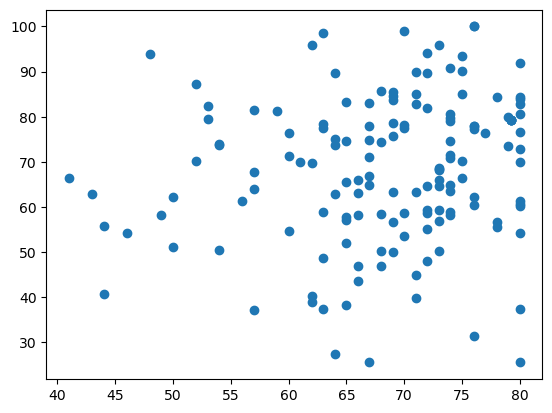

In [61]:
# 5-5. 출석일수와 평균점수 간의 상관계수를 구하고,
# 산점도(scatter plot)를 그려 시각적으로 두 변수의 관계를 확인하세요.

sca = np.corrcoef(df['출석일수'], df['평균점수'])[0,1]
plt.scatter(df['출석일수'], df['평균점수'])
print(sca)

(array([ 4.,  7.,  5., 13., 24., 24., 23., 30., 11.,  9.]),
 array([ 25.5 ,  32.95,  40.4 ,  47.85,  55.3 ,  62.75,  70.2 ,  77.65,
         85.1 ,  92.55, 100.  ]),
 <BarContainer object of 10 artists>)

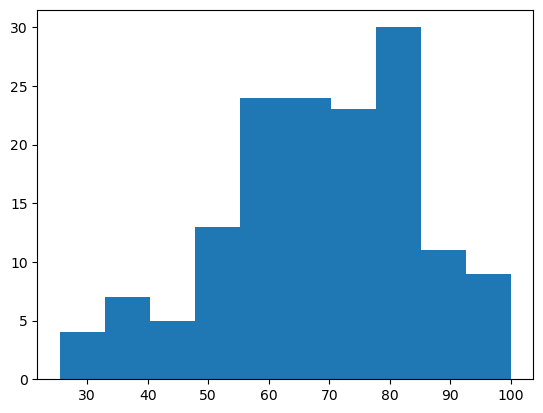

In [62]:
# 6-1. 평균점수의 히스토그램을 그리세요.
# Freedman-Diaconis Rule을 이용하여 적절한 bin 개수를 결정하세요.

stdjum = df['평균점수']

Q1, Q3 = np.percentile(stdjum, [25, 75])
IQR = Q3 - Q1

n = len(stdjum)

h = 2 * IQR / (n ** (1/3))

bin_num = np.ceil((stdjum.max() - stdjum.min()) / h)

plt.hist(stdjum, bins=10)

0.08955455426803152
-0.6695123012572317
0.787282673993273
Empty DataFrame
Columns: [학생ID, 나이, 성별, 전공, 일일공부시간, 수학점수, 영어점수, 과학점수, 수면시간, 주간운동시간, 생활만족도, 학습만족도, 출석일수, 아르바이트, 통학시간, 월용돈, 평균점수, Min-Max, 편차값, z 공부시간, z 운동시간]
Index: []

[0 rows x 21 columns]


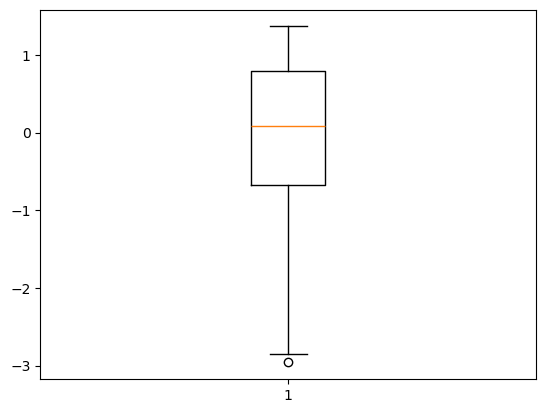

In [63]:
# 6-2. 수학점수의 Box plot을 그리고,
# 중앙값, Q1, Q3, 그리고 이상치를 확인하세요.

mathmatic = df['수학점수']

plt.boxplot(mathmatic)

Q1, Q3 = np.percentile(mathmatic, [25, 75])
IQR = Q3 - Q1

z_scores = zscore(df['수학점수'])
outliers = df[np.abs(z_scores) > 3]

middle = np.median(mathmatic)

print(middle) # 중앙값
print(Q1) 
print(Q3)
print(outliers) # 이상치 / 없음

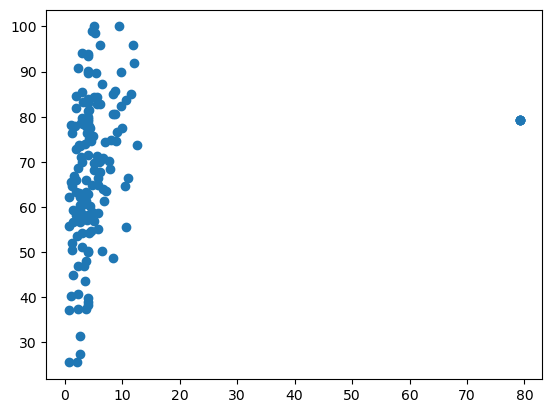

In [64]:
# 6-3. 일일공부시간과 평균점수의 산점도(scatter plot)를 그리고,
# 두 변수 간의 관계를 시각적으로 해석하세요.

plt.scatter(df['일일공부시간'], df['평균점수'])

# 상관관계가 매우 약하다
# X축 값이 좁게 몰려있고 Y축 값은 넓게 분포 → 상관성이 거의 없다.

,구간,도수
0,18 ~ 25,138
1,25 ~ 32,7
2,32 ~ 39,0
3,39 ~ 46,0
4,46 ~ 53,0
5,53 ~ 60,0
6,60 ~ 67,0
7,67 ~ 74,0
8,74 ~ 81,5


(array([138.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.]),
 array([18.  , 24.12, 30.24, 36.36, 42.48, 48.6 , 54.72, 60.84, 66.96,
        73.08, 79.2 ]),
 <BarContainer object of 10 artists>)

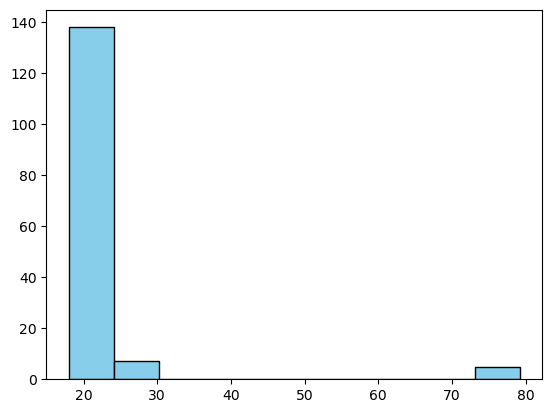

In [65]:
# 6-4. 나이별 학생 수를 나타내는 도수분포표를 작성하고, 
# 이를 히스토그램으로 시각화하세요.

age = df['나이']

n = len(age)
k = int(np.ceil(1 + np.log2(n)))

age_range = age.max() - age.min()
age_width = np.ceil(age_range / k)

bins = np.arange(age.min(), age.max() + age_width, age_width)

freq, edges = np.histogram(age, bins=bins)

freq_table = pd.DataFrame({
    "구간" : [f"{int(edges[i])} ~ {int(edges[i+1])}" for i in range(len(freq))],
    "도수": freq
})

display(freq_table)
plt.hist(age, bins=10, color='skyblue', edgecolor='black')

/tmp/ipykernel_64417/3581792480.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_scores, female_scores], labels=['male', 'female'])


{'whiskers': [<matplotlib.lines.Line2D at 0x782c4949c970>,
 'caps': [<matplotlib.lines.Line2D at 0x782c4949e2c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x782c4949dae0>,
 'medians': [<matplotlib.lines.Line2D at 0x782c4949e8c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x782c4949ebc0>,
 'means': []}

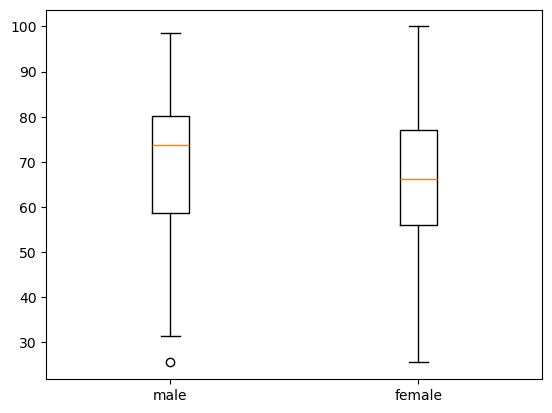

In [68]:
# 6-5. 성별에 따른 평균점수의 차이를 비교하기 위한
# 적절한 시각화 방법을 선택하고 그 이유를 설명하세요.

male_scores = df[df['성별'] == '남성']['평균점수']
female_scores = df[df['성별'] == '여성']['평균점수']

plt.boxplot([male_scores, female_scores], labels=['male', 'female'])

/tmp/ipykernel_64417/1610204535.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['math', 'english', 'science'])


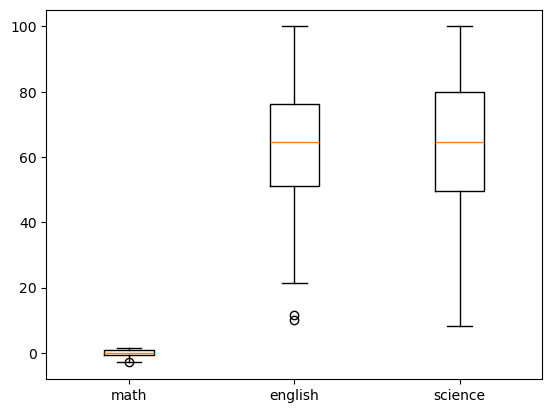

In [70]:
# 6-6. 수학점수, 영어점수, 과학점수의 분포를 하나의 그림에서
# 비교할 수 있도록 여러 개의 Box plot을 그리세요.

data = [df['수학점수'], df['영어점수'], df['과학점수']]

plt.boxplot(data, labels=['math', 'english', 'science'])
plt.show()